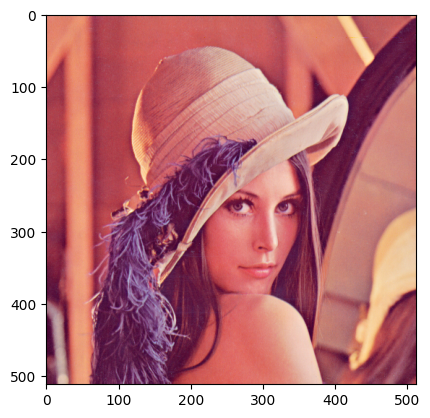

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
from PIL import Image
image_colored = Image . open ("/content/drive/MyDrive/ai image/Lenna_(test_image).png")
image_arr=np.array(image_colored)
plt.imshow ( image_colored )

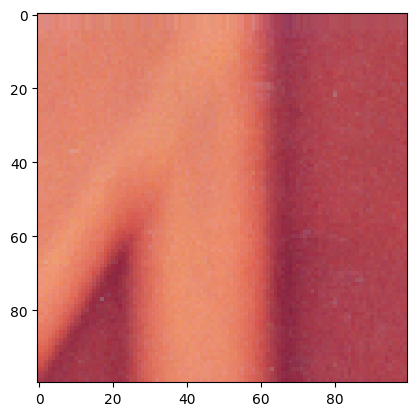

In [ ]:
top_left = image_arr[:100,:100]
plt.imshow(top_left)

In [ ]:
red=image_arr[:,:,0]
green=image_arr[:,:,1]
blue=image_arr[:,:,2]

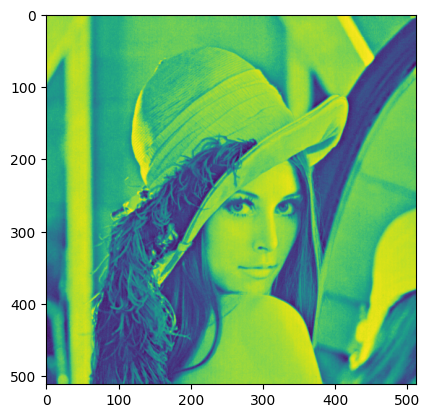

In [ ]:
plt.imshow(red)

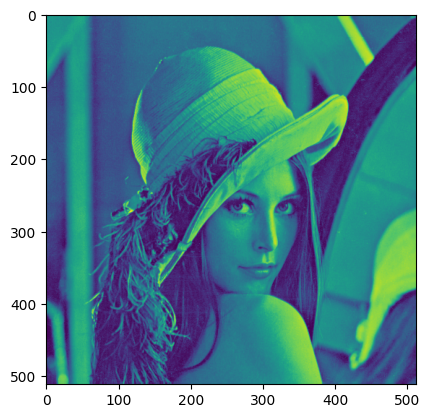

In [ ]:
plt.imshow(green)

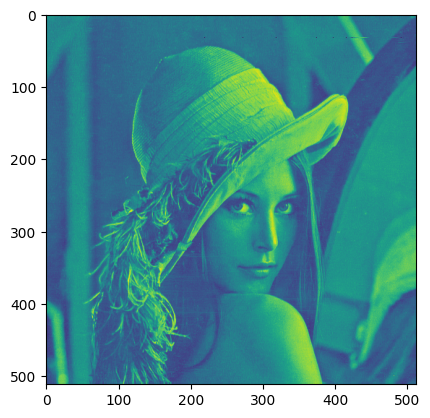

In [ ]:
plt.imshow(blue)

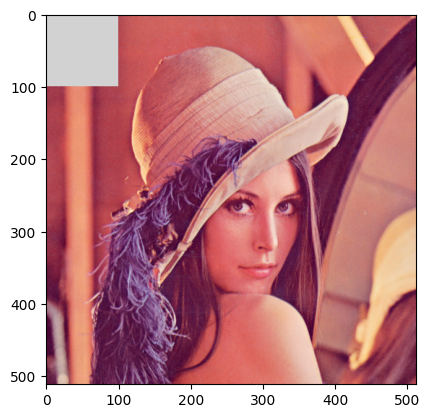

In [ ]:
modified_arr=image_arr
modified_arr[:100,:100]=210
plt.imshow(modified_arr)

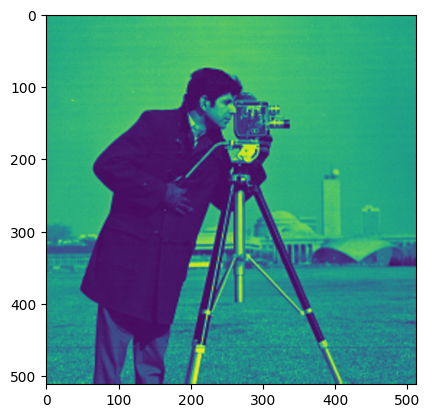

In [ ]:
grey_img=Image.open("/content/drive/MyDrive/ai image/cameraman.png")
greyimg_arr=np.array(grey_img)
plt.imshow(greyimg_arr)

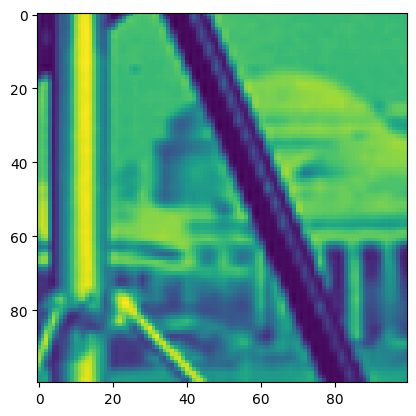

In [ ]:
(row,column)=greyimg_arr.shape
mid=int(row/2)
cropped=greyimg_arr[mid:mid+100,mid:mid+100]
plt.imshow(cropped)

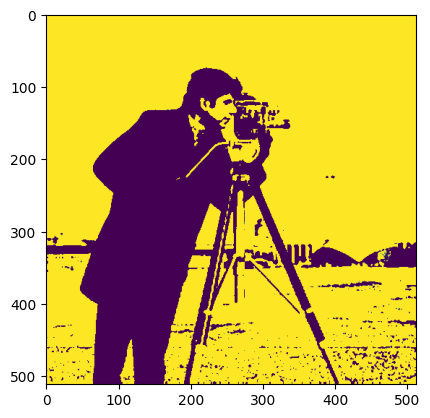

In [ ]:
thresholdimg=np.where(greyimg_arr<100,0,np.where(greyimg_arr > 100, 255, greyimg_arr))
plt.imshow(thresholdimg)

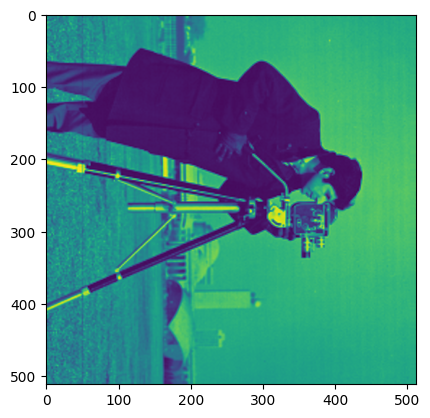

In [ ]:
rotated=grey_img.rotate(-90)
plt.imshow(rotated)

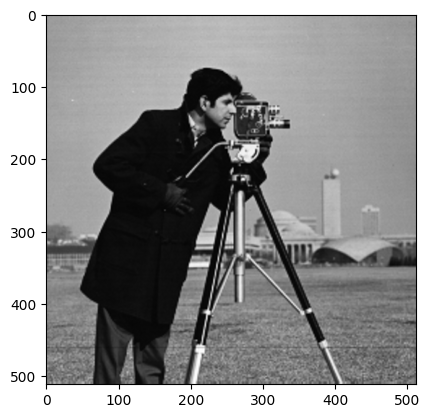

In [ ]:
rgbimg=grey_img.convert('RGB')
plt.imshow(rgbimg)

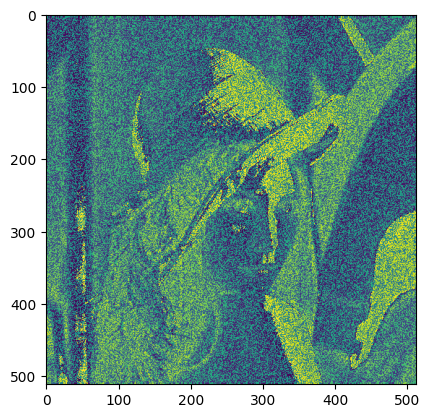

In [ ]:
pcaimg=Image.open("/content/drive/MyDrive/ai image/lena_gray.gif")
pca_arr=np.array(pcaimg)
plt.imshow(pca_arr)

In [ ]:
centeredimg=pca_arr-np.mean(pca_arr)
cov_matrix=np.cov(centeredimg,rowvar=False)
print(cov_matrix)

[[3209.09099422 3210.23773468  364.23316337 ...  157.10512476
   283.68592145  377.77078874]
 [3210.23773468 3211.50947514  365.53095569 ...  156.58408757
   283.23591533  379.06430024]
 [ 364.23316337  365.53095569 3622.23388194 ...  158.40135763
   226.61166448  140.24074654]
 ...
 [ 157.10512476  156.58408757  158.40135763 ... 3967.52544031
   937.9820817   979.9700954 ]
 [ 283.68592145  283.23591533  226.61166448 ...  937.9820817
  3999.48626697  843.69937546]
 [ 377.77078874  379.06430024  140.24074654 ...  979.9700954
   843.69937546 4098.69324471]]


In [ ]:
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

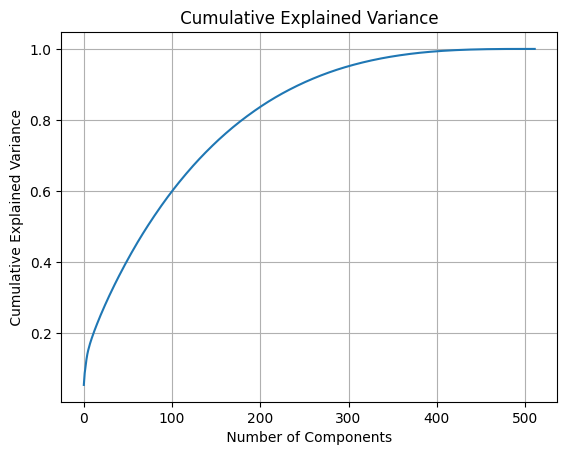

In [ ]:
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [ ]:
k=10
components = eigenvectors [: , : k ]

In [ ]:
compressed_data = np . dot ( centeredimg , components )

In [ ]:
decompressed_data = np . dot ( compressed_data , components . T ) + np.mean(pca_arr)


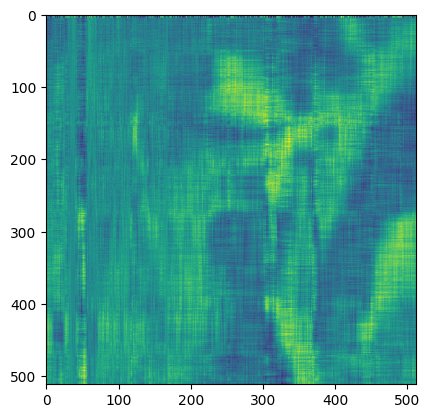

In [ ]:
plt.imshow(decompressed_data)